In [1]:
%run imports.py

### Networks

#### Ring Network

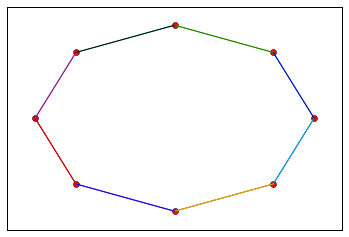

In [2]:
x = Bidirectional_Ring(8)
x.draw()

In [3]:
x.state()

[('P1', {'n': 8}),
 ('P0', {'n': 8}),
 ('P2', {'n': 8}),
 ('P4', {'n': 8}),
 ('P6', {'n': 8}),
 ('P3', {'n': 8}),
 ('P5', {'n': 8}),
 ('P7', {'n': 8})]

#### Line Network

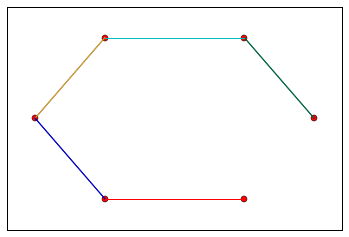

In [5]:
Bidirectional_Line(6).draw()

#### Random Line Network

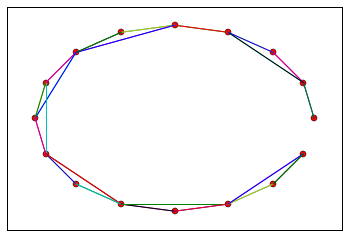

In [6]:
Random_Line_Network(16).draw()

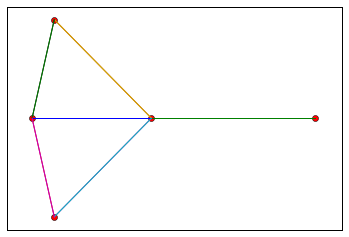

In [20]:
Random_Line_Network(5).draw()

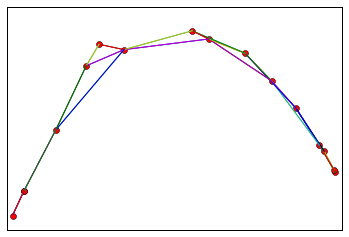

In [34]:
Random_Line_Network(16, sparsity=1).draw()
#High sparsity, lower probability of edge
#also take into consideration that distance between two edges


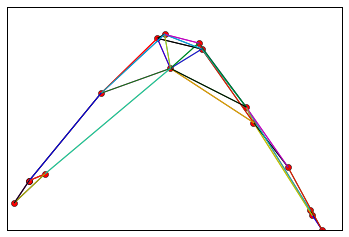

In [35]:
Random_Line_Network(16, sparsity=0.5).draw()

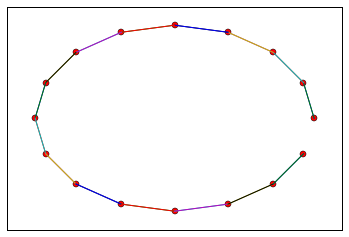

In [9]:
Random_Line_Network(16, sparsity=float('inf')).draw()

### Algorithms

#### A Basic Algorithm: LCR

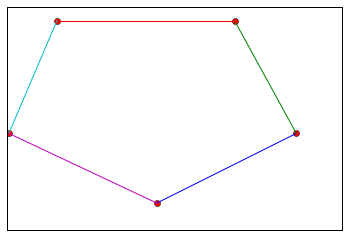

In [38]:
x = Unidirectional_Ring(5)
x.draw()

##### Initial Network State

In [43]:
x.state()

[('P2', {'n': 5, 'status': 'non-leader'}),
 ('P0', {'n': 5, 'status': 'non-leader'}),
 ('P4', {'n': 5, 'status': 'leader'}),
 ('P1', {'n': 5, 'status': 'non-leader'}),
 ('P3', {'n': 5, 'status': 'non-leader'})]

In [41]:
lcr = LCR(x)

--------------
Running LCR on
[P2 -> {P0}, P0 -> {P4}, P4 -> {P1}, P1 -> {P3}, P3 -> {P2}]
Round 1
P2.status is non-leader
P0.status is non-leader
P1.status is non-leader
Round 2
P3.status is non-leader
Round 3
Round 4
Round 5
P4.status is leader
LCR Terminated
Message Complexity: 12
Time Complexity: 5
------------------


##### Time Complexity

In [13]:
print lcr.r, "rounds"

5 rounds


##### Message Complexity

In [14]:
print lcr.message_count, "messages"

11 messages


##### Final Network State

In [15]:
x.state()

[('P2', {'n': 5, 'status': 'non-leader'}),
 ('P1', {'n': 5, 'status': 'non-leader'}),
 ('P3', {'n': 5, 'status': 'non-leader'}),
 ('P0', {'n': 5, 'status': 'non-leader'}),
 ('P4', {'n': 5, 'status': 'leader'})]

#### Chaining Algorithms

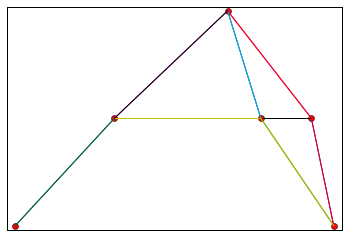

[('P2', {'n': 6}),
 ('P0', {'n': 6}),
 ('P1', {'n': 6}),
 ('P5', {'n': 6}),
 ('P3', {'n': 6}),
 ('P4', {'n': 6})]

In [49]:
x = Random_Line_Network(6)
x.draw()
x.state()

In [55]:
#Elect a Leader
SynchFloodMax(x, params={'verbosity': Algorithm.QUIET})

SynchFloodMax Terminated
Message Complexity: 80
Time Complexity: 6
------------------


<datk.core.algs.SynchFloodMax instance at 0x7f3aa7791440>

In [56]:
#Construct a BFS tree rooted at the Leader 
SynchBFS(x)

-------------------
Running SynchBFS on
[P2 -> {P0, P1}, P0 -> {P2, P1, P5}, P1 -> {P2, P0, P5, P3}, P5 -> {P0, P1, P3}, P3 -> {P1, P5, P4}, P4 -> {P3}]
Round 1
P5.parent is None
P0.parent is P5
P1.parent is P5
P3.parent is P5
Round 2
P4.parent is P3
Round 3
SynchBFS Terminated
Message Complexity: 14
Time Complexity: 3
------------------


<datk.core.algs.SynchBFS instance at 0x7f3aa779c908>

------------------------------
Running SynchConvergeHeight on


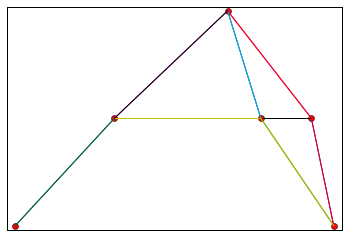

[P2 -> {P0, P1}, P0 -> {P2, P1, P5}, P1 -> {P2, P0, P5, P3}, P5 -> {P0, P1, P3}, P3 -> {P1, P5, P4}, P4 -> {P3}]
Round 1


Exception: incorrect type for out_nbrs argument of Process.send_msg()

In [57]:
SynchConvergeHeight(x, params={'draw':True})

In [58]:
x.state()

[('P2',
  {<datk.core.algs.SynchConvergeHeight instance at 0x7f3aa77a7200>: {'diam': 6,
    'send': <datk.core.distalgs.Message instance at 0x7f3aa77677e8>},
   <datk.core.algs.SynchConvergeHeight instance at 0x7f3aa789eab8>: {'diam': 6,
    'send': <datk.core.distalgs.Message instance at 0x7f3aa7834e60>},
   'n': 6,
   'parent': {},
   'status': 'non-leader'}),
 ('P0',
  {<datk.core.algs.SynchConvergeHeight instance at 0x7f3aa77a7200>: {'diam': 6},
   <datk.core.algs.SynchConvergeHeight instance at 0x7f3aa789eab8>: {'diam': 6},
   'n': 6,
   'parent': P5 -> {P0, P1, P3},
   'status': 'non-leader'}),
 ('P1',
  {<datk.core.algs.SynchConvergeHeight instance at 0x7f3aa77a7200>: {'diam': 6},
   <datk.core.algs.SynchConvergeHeight instance at 0x7f3aa789eab8>: {'diam': 6},
   'n': 6,
   'parent': P5 -> {P0, P1, P3},
   'status': 'non-leader'}),
 ('P5',
  {<datk.core.algs.SynchConvergeHeight instance at 0x7f3aa77a7200>: {'diam': 6},
   <datk.core.algs.SynchConvergeHeight instance at 0x7f3aa78

#### Equivalently, chain them like this:

In [60]:
x = Random_Line_Network(6)
A = Chain(SynchFloodMax(), Chain(SynchBFS(), SynchConvergeHeight()), params={'verbosity':Algorithm.QUIET})
A(x)

SynchFloodMax Terminated
Message Complexity: 90
Time Complexity: 6
------------------
SynchBFS Terminated
Message Complexity: 18
Time Complexity: 3
------------------
SynchConvergeHeight Terminated
Message Complexity: 6
Time Complexity: 3
------------------


In [61]:
x.state()

[('P0', {'n': 6, 'parent': P3 -> {P0, P2, P1, P5}, 'status': 'non-leader'}),
 ('P2', {'n': 6, 'parent': P3 -> {P0, P2, P1, P5}, 'status': 'non-leader'}),
 ('P3', {'n': 6, 'parent': P5 -> {P3, P1, P4}, 'status': 'non-leader'}),
 ('P1', {'n': 6, 'parent': P5 -> {P3, P1, P4}, 'status': 'non-leader'}),
 ('P5', {'height': 2, 'n': 6, 'parent': None, 'status': 'leader'}),
 ('P4', {'n': 6, 'parent': P5 -> {P3, P1, P4}, 'status': 'non-leader'})]

### Benchmarking Algorithms

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


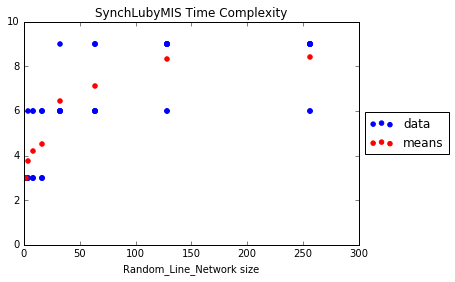

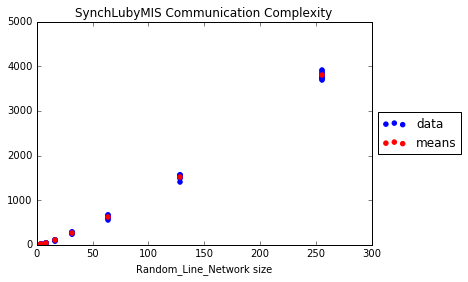

In [23]:
benchmark(SynchLubyMIS, Random_Line_Network, testLubyMIS)

In [62]:
benchmark(LCR, Bidirectional_Ring, testLeaderElection)

NameError: name 'testLeaderElection' is not defined

#### Benchmark an Asynchrounous Algorithm

In [63]:
benchmark(AsyncLCR, Unidirectional_Ring, testLeaderElection)

NameError: name 'testLeaderElection' is not defined

#### Or pass in a custom function that returns a network in the state your algorithm requires

In [64]:
def Artificial_LE_Network(n):
    x = Random_Line_Network(n)
    for p in x:
        if p.UID == n-1:
            p.state['status'] = 'leader'
    return x

Sampling n = ... 2... , 4... , 8... , 16... , 32... , 64... , 128... , 256...  DONE


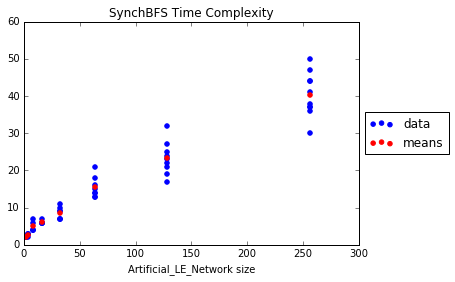

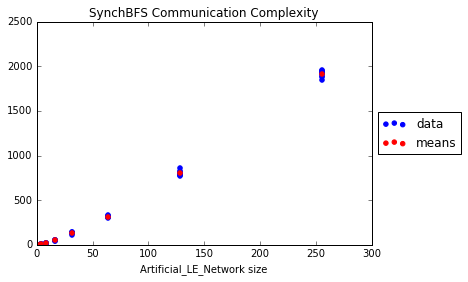

In [3]:
benchmark(SynchBFS, Artificial_LE_Network, testBFS)